# Influenza model preprocessing

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import nafot
import model
from itertools import product
import pickle
from matplotlib import pyplot as plt

In [3]:
vaccination_data = pd.read_csv(model.vaccination_data_path)
# vaccination_data

In [4]:
vacc = pd.read_csv('../../Data/vaccination_data/sample_vac_data.txt')

In [8]:
dem = pd.read_csv('../../Data/vaccination_data/sample_dem_data.txt').iloc[:,1:].copy()
dem.head(1)

,random_ID,registration_date,customer_situation,birth_year,male/female,stat_code,stat_desc,doctors_ID,doctors_random_ID,Lamas_socioeconomic_score,Points_socioeconomic_score,Points_AGAS_code,country_of_origin_code,country_of_origin_desc,date_of_immigration
0,511590,1967-02-01 00:00:00.000,1,1937,ז,4407,רמת-גן,54045588,54043622,15,9,86000112,4,ישראל,1900-01-01 00:00:00.000


In [9]:
dem[dem.stat_code==4407]

,random_ID,registration_date,customer_situation,birth_year,male/female,stat_code,stat_desc,doctors_ID,doctors_random_ID,Lamas_socioeconomic_score,Points_socioeconomic_score,Points_AGAS_code,country_of_origin_code,country_of_origin_desc,date_of_immigration
0,511590,1967-02-01 00:00:00.000,1,1937,ז,4407,רמת-גן,54045588,54043622,15,9,86000112,4,ישראל,1900-01-01 00:00:00.000
9,1991330,2000-09-01 00:00:00.000,1,2000,ז,4407,רמת-גן,50604669,50602703,14,7,86000225,4,ישראל,1900-01-01 00:00:00.000
22,919061,1994-11-01 00:00:00.000,1,1962,ז,4407,רמת-גן,17601899,17599933,13,7,86000113,4,ישראל,1900-01-01 00:00:00.000
73,2192488,2004-07-01 00:00:00.000,1,1995,ז,4407,רמת-גן,54045588,54043622,11,5,86000412,4,ישראל,1900-01-01 00:00:00.000
105,1361684,1990-08-01 00:00:00.000,1,1987,ז,4407,רמת-גן,32311045,32309079,13,7,86000113,4,ישראל,1900-01-01 00:00:00.000
180,2244546,2005-01-01 00:00:00.000,1,2005,נ,4407,רמת-גן,9113002,9111036,17,9,86000411,4,ישראל,1900-01-01 00:00:00.000
190,666687,1996-10-01 00:00:00.000,1,1976,ז,4407,רמת-גן,69828556,69826590,13,7,86000136,4,ישראל,1900-01-01 00:00:00.000
327,752830,1991-02-01 00:00:00.000,1,1940,ז,4407,רמת-גן,68146927,68144961,17,9,86000411,1,תורכיה קפריסין,1900-01-01 00:00:00.000
382,2710407,2011-07-01 00:00:00.000,1,2011,ז,4407,רמת-גן,50604669,50602703,14,7,86000324,4,ישראל,1900-01-01 00:00:00.000
502,275774,1988-08-01 00:00:00.000,1,1967,נ,4407,רמת-גן,50047281,50045315,14,7,86000132,4,ישראל,1900-01-01 00:00:00.000


## Vaccination data

In [3]:
# Load vaccination data
vaccination_data = pd.read_csv(model.vaccination_data_path)
vaccination_data['vac_date'] = pd.to_datetime(vaccination_data['vac_date'])

# Remove incomplete seasons (2007 and 2018)
vaccination_data = vaccination_data[~vaccination_data.vac_season.isin([2007, 2018])].copy()

# Get only last 5 years
# vaccination_data = vaccination_data[vaccination_data.vac_season.isin(np.arange(2008, 2017+1)[-7:])]
vaccination_data = vaccination_data[vaccination_data.vac_season.isin(np.arange(2008, 2017+1)[-5:])]  ### 5 SEASONS!!!

In [4]:
# Load clinic age population
population_by_clinic_age = pd.read_pickle('L:/Dor/Data/vaccination_data/population_by_clinic_age.pickle') 

# Get Clinic-stat area data
clinics_stat_areas = pd.read_csv('../../data/vaccination_data/clinics_with_stat_area.csv')
clinics_stat_areas.set_index('clinic_code', inplace=True)
clinics_stat_areas['subdist'] = clinics_stat_areas.stat_area_id.apply(lambda area: nafot.gdf.loc[area].SubDistrictCode)

In [5]:
vaccination_data['age'] = ((vaccination_data.vac_season - vaccination_data.birth_year) > 18).astype(int)
vaccination_data_by_age_clinic_season = vaccination_data.groupby([ 'clinic_code', 'age', 'vac_season']).count()[['random_ID']]
# vaccination_data_by_age_clinic = vaccination_data_by_age_clinic_season.groupby(['clinic_code', 'age']).mean()

# Devide by the population of each clinic and age
vaccination_data_by_age_clinic_season['random_ID'] = vaccination_data_by_age_clinic_season.apply(lambda row:
                                                 row.random_ID / population_by_clinic_age.loc[(row.name[:2])].values[0], axis=1)
vaccination_data_by_age_clinic_season.columns = ['data_coverage']

# Add stat area and subdist
vaccination_data_by_age_clinic_season['stat_area'] =\
                                            vaccination_data_by_age_clinic_season.apply(lambda row:
                                                        clinics_stat_areas.loc[row.name[0]].stat_area_id, axis=1)

vaccination_data_by_age_clinic_season['subdist'] =\
                                            vaccination_data_by_age_clinic_season.apply(lambda row:
                                                        clinics_stat_areas.loc[row.name[0]].subdist, axis=1)

# Save
vaccination_data_by_age_clinic_season.to_pickle('../../Data/influenza_model/data/vaccination_coverage_influenza.pickle')

## Influenza cases

In [2]:
# Load prep data
with open('../../Data/vaccination_model/prep_data.pickle', 'rb') as pickle_in:
    prep_data = pickle.load(pickle_in)
    
# Get population by clinic and age in Macabi data and in the network
population_by_clinic_age = prep_data['population_by_clinic_age'].copy()

In [3]:
diagnoses = pd.read_csv('L:\Dor\Data\influenza_model\data\sample_diagnoses.txt')
diagnoses.diagnosis_code = diagnoses.diagnosis_code.map(lambda x: x.strip())

# Get only influenza cases
relevant_diagnosis_codes = set(['478.9', '482.2', '482.2', '487.0', '487  ', '487  ', '487.1', 'Y22844', 'Y14678', 'Y14678',
                                'Y14696', 'Y23242', 'Y23637', 'Y14697'])
influenza_diagnoses = diagnoses[diagnoses.diagnosis_code.isin(relevant_diagnosis_codes)].copy()

# Convert the date to TimeStamp object
influenza_diagnoses.date_diagnosis = influenza_diagnoses.date_diagnosis.map(lambda x: pd.Timestamp(year=int(str(x)[:4]), month=int(str(x)[4:6]), day=int(str(x)[6:])))

# Sort by date
influenza_diagnoses.sort_values('date_diagnosis', inplace=True)

# Add season column
influenza_diagnoses['season'] = influenza_diagnoses.date_diagnosis.map(lambda date: date.year+1 if date.month >=6 else date.year)

# Get only cases in last 5 seasons
influenza_diagnoses = influenza_diagnoses[influenza_diagnoses.season.isin([2011,2012,2013,2014,2015,2016,2017])].copy()
# influenza_diagnoses = influenza_diagnoses[influenza_diagnoses.season.isin([2013,2014,2015,2016,2017])].copy()  ### 5 SEASONS!!!


# Add age
# Load demographic data
demographic_data = pd.read_csv('L:\Dor\Data\influenza_model\data\sample_dem_data.txt')

# Add birth year to the diagnoses data
influenza_diagnoses = influenza_diagnoses.merge(demographic_data[['random_ID', 'birth_year', 'stat_code']], left_on='random_ID',
                                                right_on='random_ID')

# Add age at diagnosis date column
influenza_diagnoses['age'] = influenza_diagnoses.apply(lambda row: ((row.date_diagnosis.year - row.birth_year) > 18), axis=1).astype(int)

# Get only relevant columns
influenza_diagnoses = influenza_diagnoses[['random_ID', 'season', 'age', 'stat_code', 'date_diagnosis']].copy()
influenza_diagnoses.columns = ['random_ID', 'season', 'age', 'clinic_code', 'date_diagnosis']

# Sort by date
influenza_diagnoses.sort_values('date_diagnosis', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Create daily influenza data

In [ ]:
# Group by date
influenza_cases = influenza_diagnoses.copy()
influenza_cases = influenza_cases.groupby(['clinic_code', 'age', 'date_diagnosis']).count()[['random_ID']]

# Initialize a Data frame with all relevant dates
dates = [pd.Timestamp(2010,6,1) + pd.Timedelta(i, unit='d') for i in range(365*7+2)]
# dates = [pd.Timestamp(2012,6,1) + pd.Timedelta(i, unit='d') for i in range(365*5)]  #### 5 SEASONS!!!
influenza_cases_daily = pd.DataFrame(list(product(dates, influenza_diagnoses.clinic_code.unique(), [0,1])),
                                     columns=['date', 'clinic_code', 'age'])
influenza_cases_daily.set_index(['clinic_code', 'age', 'date'], inplace=True)

# Add the number of case for each date (0 if there are none)
influenza_cases_daily['cases'] = influenza_cases_daily.index.map(lambda x:
                                                                 influenza_cases.loc[x] if x in influenza_cases.index else 0)
influenza_cases_daily.cases = influenza_cases_daily.cases.astype(int)
influenza_cases_daily.reset_index(inplace=True)

# Aggregate weekly cases by clinic and age
# Initialize a dictionary
influenza_weekly_cases_by_clinic_age = {}

# Go over all combinations of clinic_code and age and aggregate weekly
# for clinic, age in product(influenza_diagnoses.clinic_code.unique(), [0,1]):
for clinic, age in population_by_clinic_age.index:
    # Get only relevant clinc and age
    cur_influenza_cases = influenza_cases_daily[(influenza_cases_daily.clinic_code == clinic)&(influenza_cases_daily.age == age)].copy()
    # Aggregate weekly
    cur_influenza_weekly_cases = cur_influenza_cases.set_index('date').resample('W').sum()[['cases']].copy()
    # Add season column
    cur_influenza_weekly_cases['season'] = cur_influenza_weekly_cases.index.map(lambda date: date.year+1 if date.month >=6
                                                                                else date.year)
    cur_influenza_weekly_cases.columns = ['cases', 'season']
    cur_influenza_weekly_cases = cur_influenza_weekly_cases[['season', 'cases']]
    # Add to the dictionary
    influenza_weekly_cases_by_clinic_age[(clinic, age)] = cur_influenza_weekly_cases[:-1].copy()
    
# Update the total by age group as a sum of all the relevnat clinic, age groups
# Initialize a dictionary
influenza_weekly_cases_by_age = {age: list(influenza_weekly_cases_by_clinic_age.values())[0].copy()
                                       for age in [0, 1]}
# Children
influenza_weekly_cases_by_age[0].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy() 
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 0])
# Adults
influenza_weekly_cases_by_age[1].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 1])


# Update the total as a sum of all the clinics and age groups
total_influenza_weekly_cases = influenza_weekly_cases_by_age[0].copy()
total_influenza_weekly_cases.cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                          for clinic, age in influenza_weekly_cases_by_clinic_age])

In [ ]:
plt.figure(figsize=(15,7))
influenza_weekly_cases_by_age[0].cases.plot()
influenza_weekly_cases_by_age[1].cases.plot()
total_influenza_weekly_cases.cases.plot()
plt.show()

In [ ]:
total_influenza_weekly_cases.shape

In [78]:
total_influenza_weekly_cases[total_influenza_weekly_cases.season==2013].iloc[26:36].sum()

season    20130
cases      1616
dtype: int64

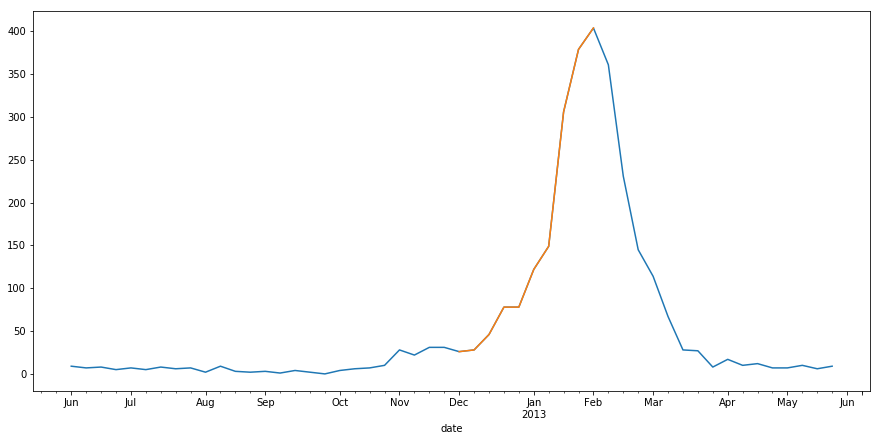

In [81]:
plt.figure(figsize=(15,7))
total_influenza_weekly_cases[total_influenza_weekly_cases.season==2013].cases.plot()
total_influenza_weekly_cases[total_influenza_weekly_cases.season==2013].iloc[26:36].cases.plot()

In [67]:
relevant_clinics = [c for c, a in prep_data['relevant_clinics_age']]
relevant_clinics = np.unique(relevant_clinics)
relevant_clinics

array([2207, 2209, 2210, 2211, 2212, 2213, 2215, 2216, 3303, 3304, 3305,
       3306, 3307, 3308, 3309, 3310, 3311, 3312, 3314, 3315, 3318, 3320,
       3321, 3322, 4403, 4404, 4405, 4407, 4408, 4409, 4410, 4411, 4412,
       4413, 4414, 5504, 5505, 5506, 5507, 5509, 5510, 5511, 5512, 5513,
       5514, 5516, 5517, 5521, 5522, 5523, 5525, 5526, 5527, 5528, 5529,
       5531, 5532, 5533, 5534, 5535, 6605, 6607, 6610, 6611, 6613, 6614,
       6615, 6616, 6617, 6618, 6619, 6624, 6626, 7704, 7713, 7714, 7720],
      dtype=int64)

In [121]:
cases_2013 = {}

for clinic in relevant_clinics:
    
    cur_clinic_data = influenza_weekly_cases_by_clinic_age[(clinic, 1)]
    
    if (clinic, 0) in prep_data['relevant_clinics_age']:
        cur_clinic_data.cases += influenza_weekly_cases_by_clinic_age[(clinic, 0)].cases 

    # Get only 2013 season
    cur_clinic_data = cur_clinic_data[cur_clinic_data.season==2013].iloc[26:36].copy()
    cur_clinic_data = cur_clinic_data/cur_clinic_data.sum()
    
    cases_2013[clinic] = cur_clinic_data

In [122]:
cases_2013[clinic].iloc[:]

,season,cases
date,,
2012-12-02,0.1,0.000000
2012-12-09,0.1,0.000000
2012-12-16,0.1,0.000000
2012-12-23,0.1,0.000000
2012-12-30,0.1,0.000000
2013-01-06,0.1,0.000000
2013-01-13,0.1,0.666667
2013-01-20,0.1,0.333333
2013-01-27,0.1,0.000000


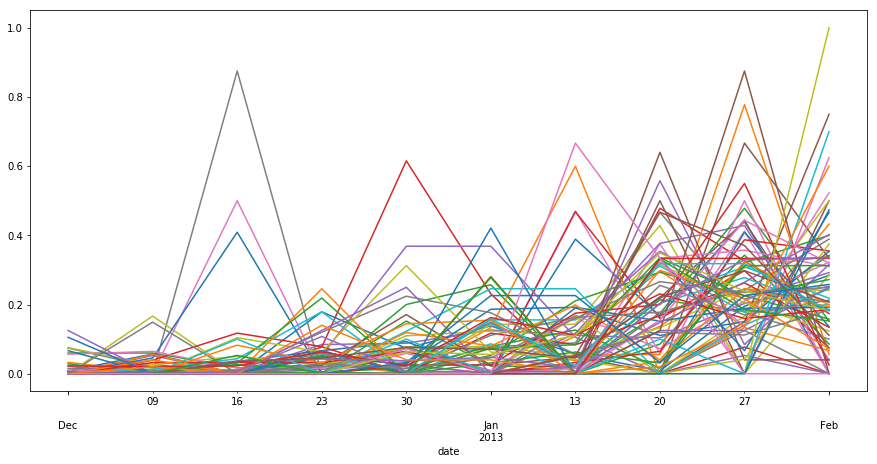

In [123]:
plt.figure(figsize=(15,7))
for clinic in cases_2013:
    cases_2013[clinic].cases.plot()
plt.show()

### Adjust inflenza cases

#### Adjust to attack rate

In [87]:
# Network population by age
net_pop_by_age = np.array([population_by_clinic_age.loc[pd.IndexSlice[:,age], 'network_population'].sum() for age in [0, 1]])
data_pop_by_age = np.array([population_by_clinic_age.loc[pd.IndexSlice[:,age], 'data_population'].sum() for age in [0, 1]])

# Calculate the 5-year attack rate for each age group
# data_attack_rates = np.array([influenza_weekly_case_by_age[age].cases.sum()/net_pop_by_age[age] for age in [0, 1]])
data_attack_rates = np.array([influenza_weekly_cases_by_age[age].cases.sum()/data_pop_by_age[age] for age in [0, 1]])
  
# Attack rate - Vaccince paper
paper_attack_rates = {'0-3': 0.203, '4-24': 0.102, '25-49': 0.066, '50-64': 0.066, '65+': 0.09}

# Load israeli population by age
israeli_pop_all_ages = pd.read_excel('../data/population_all_age_groups.xlsx', sheet_name='israeli_pop')
israeli_pop_all_ages.set_index('age', inplace=True)

# Proportion calculation for age group adjustments
# 0-3 out of 0-17
prop_03_017 = israeli_pop_all_ages.iloc[0:3+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[0:17+1,:].israeli_pop.sum()
# 4-17 out of 0-17
prop_417_017 = israeli_pop_all_ages.iloc[4:17+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[0:17+1,:].israeli_pop.sum()

# 18-24 out of 18+
prop_1824_18 = israeli_pop_all_ages.iloc[18:24+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[18:,:].israeli_pop.sum()
# 25-49 out of 18+
prop_2549_18 = israeli_pop_all_ages.iloc[25:49+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[18:,:].israeli_pop.sum()
# 50-64 out of 18+
prop_5064_18 = israeli_pop_all_ages.iloc[50:64+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[18:,:].israeli_pop.sum()
# 65+ out of 18+
prop_65_18 = israeli_pop_all_ages.iloc[65:,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[18:,:].israeli_pop.sum()

# Attack rate in model age groups
attack_rates = np.array([prop_03_017*paper_attack_rates['0-3']+prop_417_017*paper_attack_rates['4-24'],
                         prop_1824_18*paper_attack_rates['4-24']+prop_2549_18*paper_attack_rates['25-49']+
                         prop_5064_18*paper_attack_rates['50-64']+prop_65_18*paper_attack_rates['65+']])

# 5-year attack rate
attack_rates_5year = attack_rates*7
# attack_rates_5year = attack_rates*5  ### 5 SEASONS


# Calculate the factor between the data and the real attack rates
adj_factor = attack_rates_5year / data_attack_rates

# Adjust the infection data according to adjustment factor
for clinic, age in influenza_weekly_cases_by_clinic_age:
    influenza_weekly_cases_by_clinic_age[(clinic, age)].cases *= adj_factor[age]
    
# Update the total by age group as a sum of all the relevnat clinic, age groups
# Children
influenza_weekly_cases_by_age[0].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy() 
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 0])
# Adults
influenza_weekly_cases_by_age[1].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 1])
    
# Update the total as a sum of all the clinics and age groups
total_influenza_weekly_cases.cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                          for clinic, age in influenza_weekly_cases_by_clinic_age])

# Recalculate data attack rates
data_attack_rates_updated = np.array([influenza_weekly_cases_by_age[age].cases.sum()/data_pop_by_age[age] for age in [0, 1]])

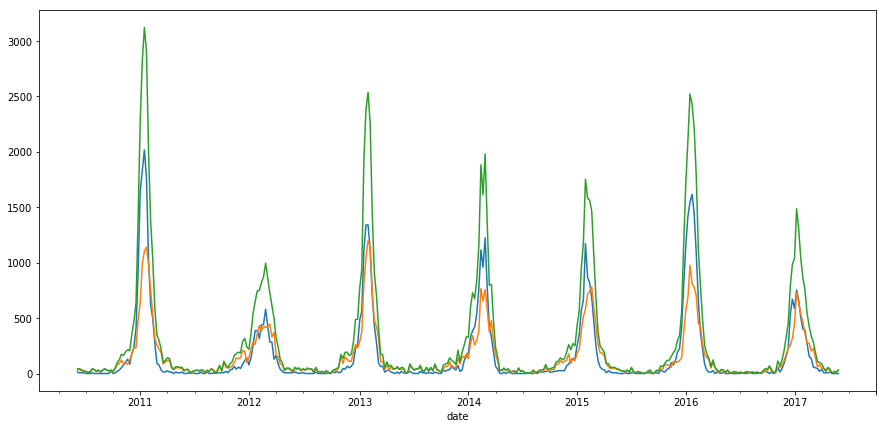

In [88]:
plt.figure(figsize=(15,7))
influenza_weekly_cases_by_age[0].cases.plot()
influenza_weekly_cases_by_age[1].cases.plot()
total_influenza_weekly_cases.cases.plot()
plt.show()

#### Adjust to population size

In [89]:
# Adjust the infection data according to adjustment factor
for clinic, age in influenza_weekly_cases_by_clinic_age:
    influenza_weekly_cases_by_clinic_age[(clinic, age)].cases *= population_by_clinic_age.loc[(clinic, age), 'factor']
#     influenza_weekly_cases_by_clinic_age[(clinic, age)].cases = influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.copy()*population_by_clinic_age.loc[(clinic, age), 'factor']


# # Remove irrelevant (clinic, age) combinations (doesn't exist in the network)
# influenza_weekly_cases_by_clinic_age = {k: v for k,v in influenza_weekly_cases_by_clinic_age.items()
#                                         if k in population_by_clinic_age.index}

# Update the total by age group as a sum of all the relevnat clinic, age groups
# Children
influenza_weekly_cases_by_age[0].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy() 
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 0])
# Adults
influenza_weekly_cases_by_age[1].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 1])

# Update the total by subdist as a sum of all the relevnat clinic, age groups
influenza_weekly_cases_by_subdist = {key: influenza_weekly_cases_by_age[0].copy() for key in prep_data['relevant_subdists_age']}
# load subdist by clinic
clinics_subdists = pd.read_pickle('../../data/vaccination_data/clinics_with_stat_area.pickle').subdist

# Go over all subdists and sum
for subdist, age in prep_data['relevant_subdists_age']:
    influenza_weekly_cases_by_subdist[(subdist, age)].cases = \
                                        sum([influenza_weekly_cases_by_clinic_age[(clinic, cur_age)].cases.values.copy()
                                        for clinic, cur_age in influenza_weekly_cases_by_clinic_age
                                        if clinics_subdists.loc[clinic] == subdist and cur_age == age])

# Update the total as a sum of all the clinics and age groups
total_influenza_weekly_cases.cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                          for clinic, age in influenza_weekly_cases_by_clinic_age])

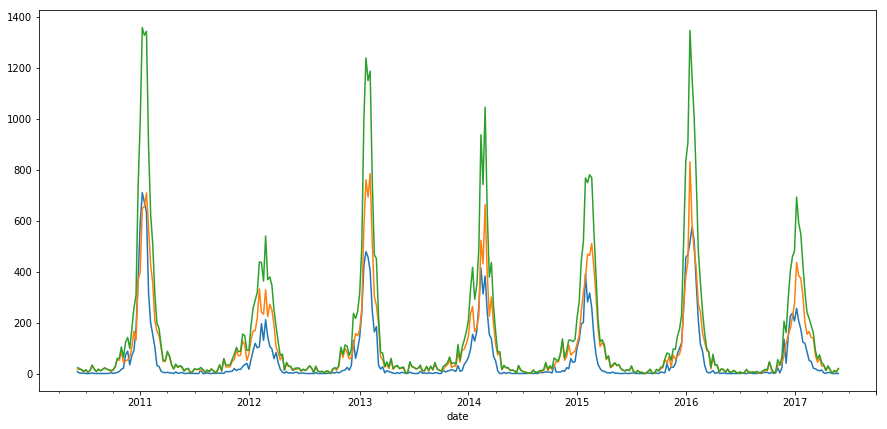

In [90]:
plt.figure(figsize=(15,7))
influenza_weekly_cases_by_age[0].cases.plot()
influenza_weekly_cases_by_age[1].cases.plot()
total_influenza_weekly_cases.cases.plot()
plt.show()

In [94]:
relevant_subdists = np.unique([s for s,a in prep_data['relevant_subdists_age']])

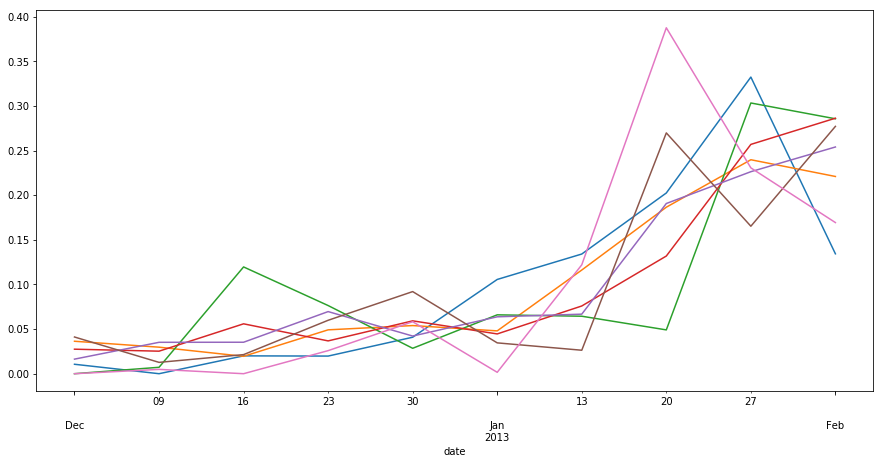

In [126]:
plt.figure(figsize=(15,7))
for subdist in relevant_subdists:
    cur_subdist_data = influenza_weekly_cases_by_subdist[(subdist,0)]
    cur_subdist_data.cases += influenza_weekly_cases_by_subdist[(subdist,1)].cases
    
    cur_subdist_data = cur_subdist_data[cur_subdist_data.season==2013].iloc[26:36].copy()
    cur_subdist_data = cur_subdist_data/cur_subdist_data.sum()
    
    cur_subdist_data.cases.plot()

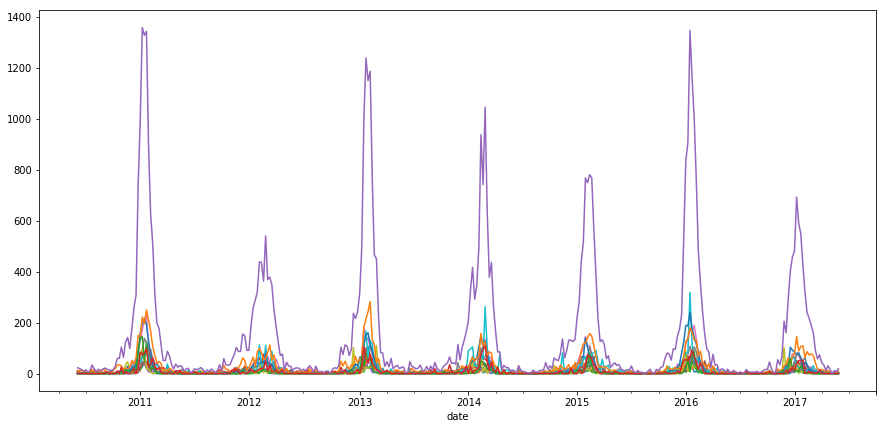

In [91]:
plt.figure(figsize=(15,7))
for key in influenza_weekly_cases_by_subdist:
#     if key[1] == 0:
    influenza_weekly_cases_by_subdist[key].cases.plot()
total_influenza_weekly_cases.cases.plot()
plt.show()

Save

In [43]:
# Save
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_clinic_age.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_clinic_age, pickle_out)
    
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_age.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_age, pickle_out)
    
        
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_subdist.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_subdist, pickle_out)
    
total_influenza_weekly_cases.to_pickle('../../Data/influenza_model/data/total_influenza_weekly_cases.pickle')  

### Infection rate by season, clinic and age

#### Population proportion by subdist and age

In [44]:
population = prep_data['population_by_clinic_age'].copy()

# Add subdist
population['subdist'] = population.apply(lambda row: clinics_subdists.loc[row.name[0]], axis=1)

prop_data_pop = {}
prop_net_pop = {}

for subdist, age in prep_data['relevant_subdists_age']:
    cur_df = population[population.subdist==subdist].loc[pd.IndexSlice[:,age], :]
    prop_data_pop.update(dict(cur_df.data_population / cur_df.data_population.sum()))
    prop_net_pop.update(dict(cur_df.network_population / cur_df.network_population.sum()))

#### By clinic

In [45]:
# Go over the seasons
infection_rates = {}
# for season in model.seasons:
for season in [2011, 2012] + model.seasons:
    infection_rate_by_clinic_age = []
    # For each season go over each clinic and age
    for clinic, age in prep_data['relevant_clinics_age']:
        # Get number of cases in current season, clinic and age
        cur_clinic_cases = influenza_weekly_cases_by_clinic_age[(clinic, age)]
        cases = cur_clinic_cases[cur_clinic_cases.season==season].cases.sum()
        # Get population of total clinic (network population because cases are normalized to the size of the network)
        population = population_by_clinic_age.loc[(clinic, age)].network_population
        # Calculate the infection rate and add it to the list
        infection_rate_by_clinic_age.append([clinic, age, cases/population])
    # Create a DF of the infection rates in current season and asve it to the dict
    infection_rate_by_clinic_age_df = pd.DataFrame(infection_rate_by_clinic_age, columns=['clinic_code', 'age', 'infection_rate'])
    infection_rate_by_clinic_age_df.set_index(['clinic_code', 'age'], inplace=True)
    # Add population proportion out of subdist
    # Add stat area and subdist
    infection_rate_by_clinic_age_df['subdist'] = infection_rate_by_clinic_age_df.apply(lambda row: clinics_subdists.loc[row.name[0]], axis=1)
    # Add prop out of subdist (if the clinic is not relevant - 0)
    infection_rate_by_clinic_age_df['pop_prop'] = infection_rate_by_clinic_age_df.index.map(lambda x: prop_net_pop.get(x,0))
    infection_rates[season] = infection_rate_by_clinic_age_df

with open('../../Data/influenza_model/data/infection_rates_clinics.pickle', 'wb') as pickle_out:
    pickle.dump(infection_rates, pickle_out)

### Short season

In [18]:
# Short season
dates_2017_short = [pd.Timestamp(2016, 9, 1) + pd.Timedelta(days=1) * i for i in range(273)]
# dates_2017_short = [pd.Timestamp(2016, 10, 1) + pd.Timedelta(days=1) * i for i in range(243)]

day_in_season_short = [(date - pd.datetime(date.year if date.month > 5 else date.year - 1, 6, 1)).days
                       for date in dates_2017_short]

In [19]:
# Get relevant locs for each season
locs = []
sizes = []
for season in model.seasons:
    example_season_df = total_influenza_weekly_cases[total_influenza_weekly_cases.season == season].copy()
    
    # Go over the date and get the relevant start and stop locations
    start, stop = 0,0
    for i, date in enumerate(example_season_df.index):
        if date.month == 9:
#         if date.month == 10:
            start = i
            break
    # Save the start and stop location for current season
    locs.append(start)
    sizes.append(example_season_df.index.size)
    
# Get the relevant indices for all seasons
short_season_idx = np.concatenate([sum(sizes[:i]) + np.arange(locs[i],sizes[i]) for i in range(len(model.seasons))])

Update data for fit

In [20]:
# Get only relevant dates - by clinic and age
for clinic, age in influenza_weekly_cases_by_clinic_age:
    influenza_weekly_cases_by_clinic_age[(clinic, age)] = influenza_weekly_cases_by_clinic_age[(clinic, age)].iloc[short_season_idx]

# Update the total by age group as a sum of all the relevnat clinic, age groups
# Children
# Initialize to one of the dfs (will be updated)
influenza_weekly_cases_by_age[0] = list(influenza_weekly_cases_by_clinic_age.values())[0].copy()
influenza_weekly_cases_by_age[0].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy() 
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 0])
# Adults
# Initialize to one of the dfs (will be updated)
influenza_weekly_cases_by_age[1] = list(influenza_weekly_cases_by_clinic_age.values())[0].copy()
influenza_weekly_cases_by_age[1].cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                             for clinic, age in influenza_weekly_cases_by_clinic_age if age == 1])

# Update the total by subdist as a sum of all the relevnat clinic, age groups
influenza_weekly_cases_by_subdist = {key: influenza_weekly_cases_by_age[0].copy() for key in prep_data['relevant_subdists_age']}
# load subdist by clinic
clinics_subdists = pd.read_pickle('../../data/vaccination_data/clinics_with_stat_area.pickle').subdist

# Go over all subdists and sum
for subdist, age in prep_data['relevant_subdists_age']:
    influenza_weekly_cases_by_subdist[(subdist, age)].cases = \
                                        sum([influenza_weekly_cases_by_clinic_age[(clinic, cur_age)].cases.values.copy()
                                        for clinic, cur_age in influenza_weekly_cases_by_clinic_age
                                        if clinics_subdists.loc[clinic] == subdist and cur_age == age])

# Update the total as a sum of all the clinics and age groups
# Initialize to one of the dfs (will be updated)
total_influenza_weekly_cases = list(influenza_weekly_cases_by_clinic_age.values())[0].copy()
total_influenza_weekly_cases.cases = sum([influenza_weekly_cases_by_clinic_age[(clinic, age)].cases.values.copy()
                                          for clinic, age in influenza_weekly_cases_by_clinic_age])

In [21]:
# Save - short
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_clinic_age_short.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_clinic_age, pickle_out)
    
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_age_short.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_subdist, pickle_out)
    
        
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_subdist_short.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_age, pickle_out)
    
total_influenza_weekly_cases.to_pickle('../../Data/influenza_model/data/total_influenza_weekly_cases_short.pickle')  

In [22]:
# Save - short
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_clinic_age_short_10.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_clinic_age, pickle_out)
    
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_age_short_10.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_subdist, pickle_out)
    
        
with open('../../Data/influenza_model/data/influenza_weekly_cases_by_subdist_short_10.pickle', 'wb') as pickle_out:
    pickle.dump(influenza_weekly_cases_by_age, pickle_out)
    
total_influenza_weekly_cases.to_pickle('../../Data/influenza_model/data/total_influenza_weekly_cases_short_10.pickle')  

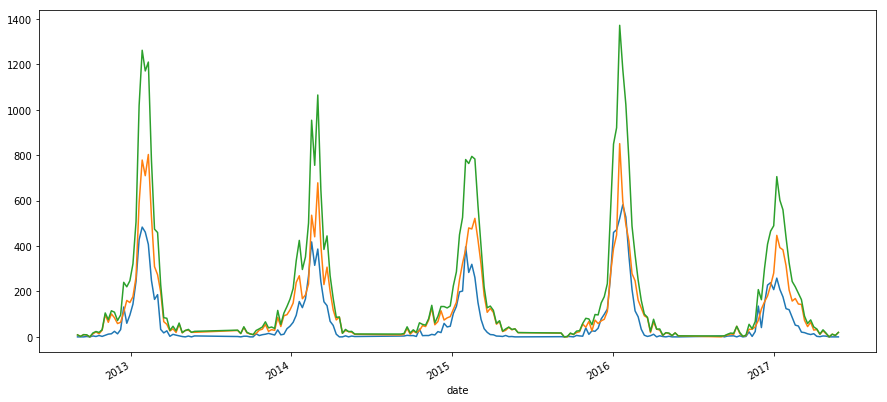

In [23]:
plt.figure(figsize=(15,7))
influenza_weekly_cases_by_age[0].cases.plot()
influenza_weekly_cases_by_age[1].cases.plot()
total_influenza_weekly_cases.cases.plot()
plt.show()

## Recovery rates

In [24]:
# Recovery rate in days from literature
recovery_0_5 = 8
recovery_6_14 = 6.5
recovery_15 = 4.5

# Load israeli population by age
israeli_pop_all_ages = pd.read_excel('../data/population_all_age_groups.xlsx', sheet_name='israeli_pop')
israeli_pop_all_ages.set_index('age', inplace=True)

# 0-5 out of 0-17
prop05_017 = israeli_pop_all_ages.iloc[0:5+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[0:17+1,:].israeli_pop.sum()

# 6-14 out of 0-17
prop614_017 = israeli_pop_all_ages.iloc[6:14+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[0:17+1,:].israeli_pop.sum()

# 15-17 out of 0-17
prop1517_017 = israeli_pop_all_ages.iloc[15:17+1,:].israeli_pop.sum() / israeli_pop_all_ages.iloc[0:17+1,:].israeli_pop.sum()

children_recovery_rate = 1 / (prop05_017*recovery_0_5 + prop614_017*recovery_6_14 + prop1517_017*recovery_15)
adults_recovery_rate = 1 / recovery_15

print(children_recovery_rate)
print(adults_recovery_rate)

0.1477929674216146
0.2222222222222222
